# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"><img src="../images/icon102.png" width="38px"></img> **Hopsworks Feature Store** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 01: Load, Engineer & Connect</span>

<span style="font-width:bold; font-size: 1.4rem;"> This is the first part of the quick start series of tutorials about Hopsworks Feature Store. As part of this first module, we will work with data related to credit card transactions. 
The objective of this tutorial is to demonstrate how to work with the **Hopworks Feature Store**.</span>

## **🗒️ This notebook is divided in 4 sections:** 
1. Importing Libraries.
2. Loading Data.
3. Basic exploration.
4. Feature Engineering

![tutorial-flow](../images/01_featuregroups.png)

First of all we will load the data and do some feature engineering on it.

---

### <span style="color:#ff5f27;">🧑🏻‍🏫 Home Credit Default Risk</span>

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

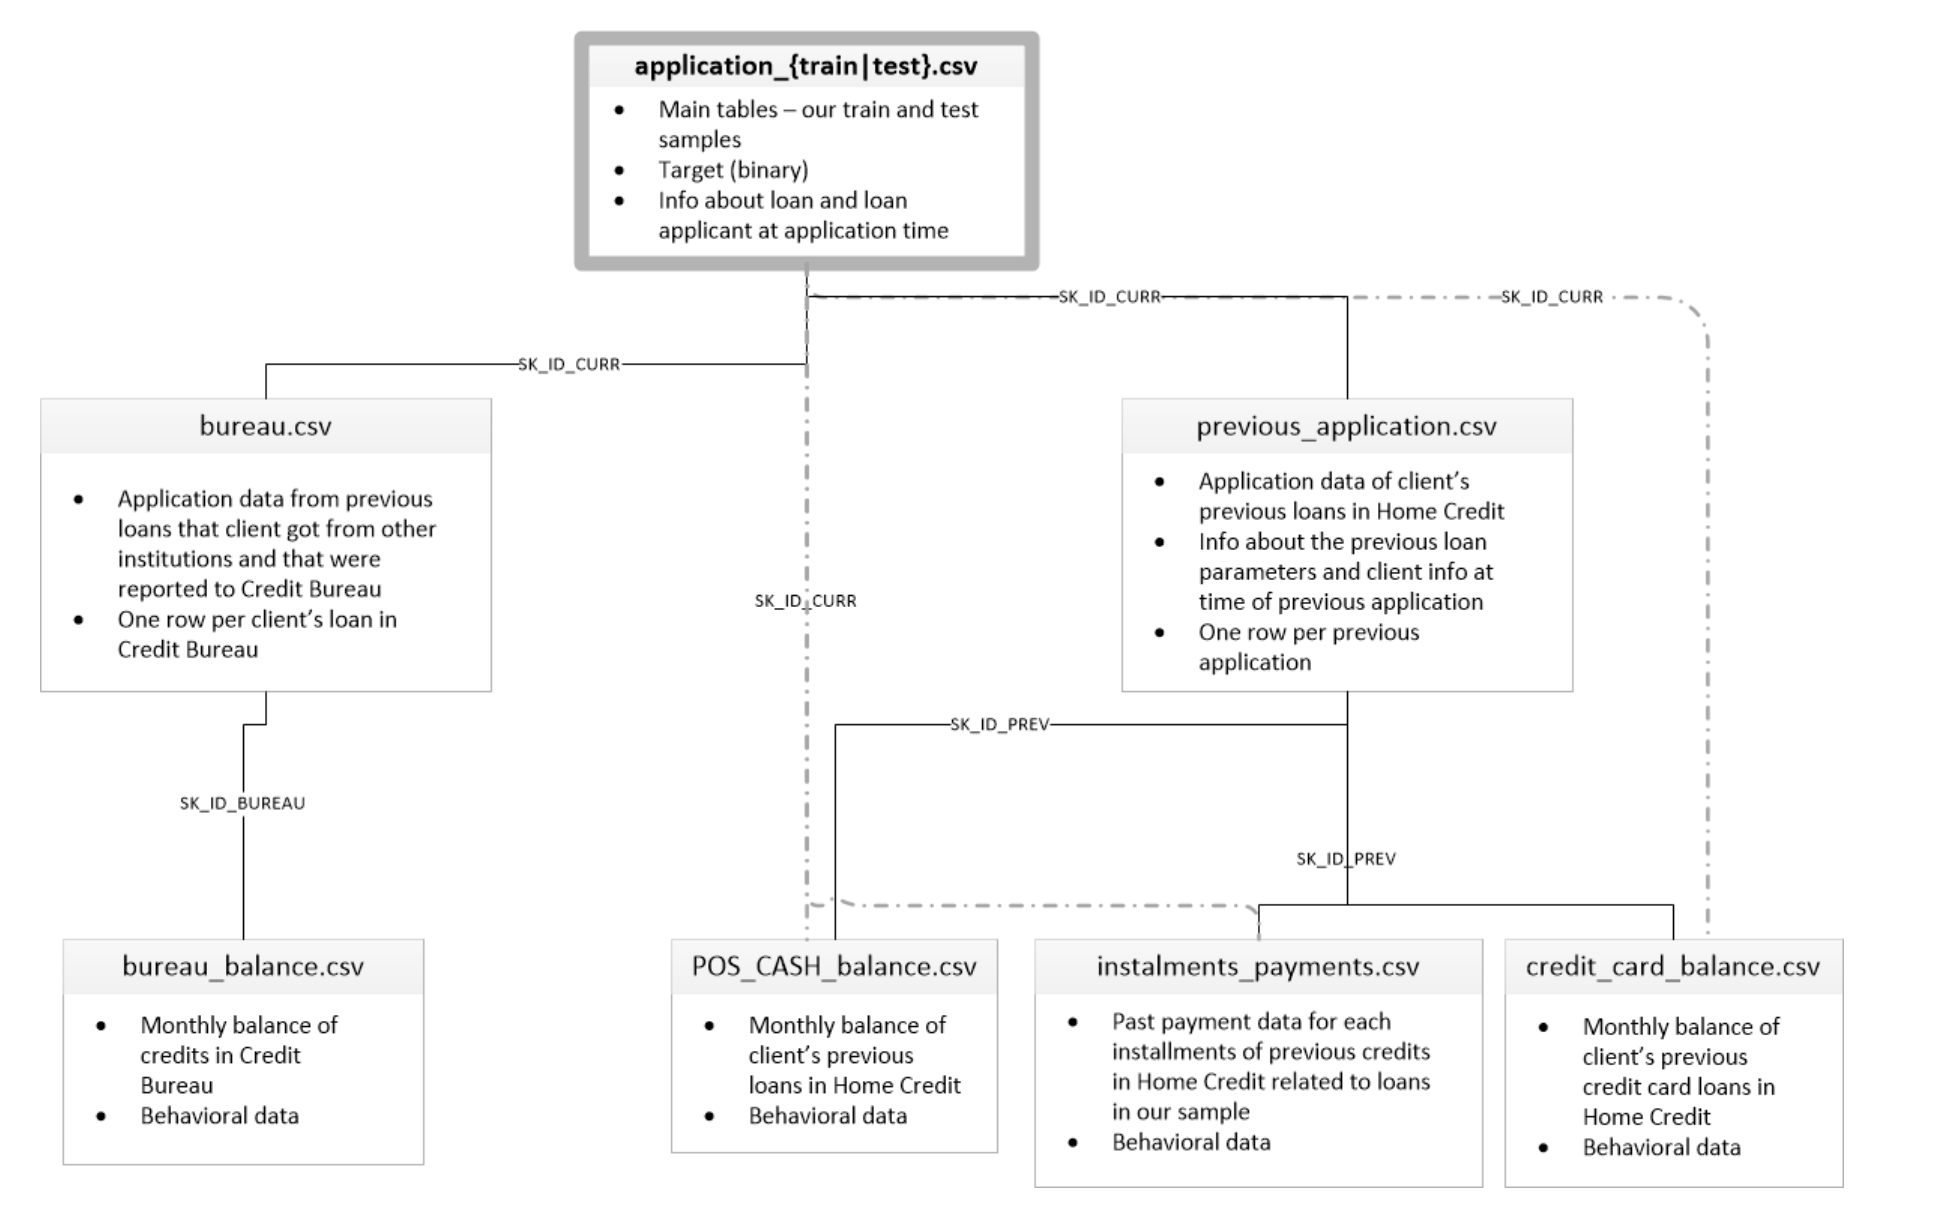

---

## <span style="color:#ff5f27;">📝 Importing Libraries</span>

- `pandas` - to manipulate with our data.

- `matplotlib` and `seaborn` in order to create breathtaking plots.

- `hdfs` - Hadoop File System in order to access data.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from hops import hdfs

2022-06-19 20:24:18,762 INFO: generated new fontManager


> Using `hdfs` we can get **project name** using `hdfs.project_name()` method and **project path** using `hdfs.project_path()` method.

In [2]:
project_name = hdfs.project_name()
project_name

'Credit_scores'

In [3]:
project_path = hdfs.project_path()
project_path

'hdfs://rpc.namenode.service.consul:8020/Projects/Credit_scores/'

## <span style="color:#ff5f27;"> 💽 Loading the Data </span>

#### <span style="color:#ff5f27;">⛳️ Application Train dataset</span>

The main training dataset contains information about each loan application at Home Credit. Every loan has its own row and is identified by the feature **SK_ID_CURR**. This dataset has binary target indicating if the loan was repaid(0) or not(1).

In [4]:
application_train = pd.read_csv(project_path + 'Jupyter/data/application_train.csv')

application_train.head()

/srv/hops/anaconda/envs/theenv/lib/python3.8/site-packages/fsspec/implementations/hdfs.py:83: FutureWarning: pyarrow.hdfs.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  self.client = HadoopFileSystem(


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_train.shape

(307511, 122)

In [6]:
application_train.isna().sum()[application_train.isna().sum() > 0]

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

#### <span style="color:#ff5f27;">⛳️ Application Test dataset</span>

In [7]:
application_test = pd.read_csv(project_path + 'Jupyter/data/application_test.csv')

application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
application_test.shape

(48744, 121)

In [9]:
application_test.isna().sum()[application_test.isna().sum() > 0]

AMT_ANNUITY                      24
NAME_TYPE_SUITE                 911
OWN_CAR_AGE                   32312
OCCUPATION_TYPE               15605
EXT_SOURCE_1                  20532
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      6049
AMT_REQ_CREDIT_BUREAU_WEEK     6049
AMT_REQ_CREDIT_BUREAU_MON      6049
AMT_REQ_CREDIT_BUREAU_QRT      6049
AMT_REQ_CREDIT_BUREAU_YEAR     6049
Length: 64, dtype: int64

#### <span style="color:#ff5f27;">⛳️ Bureau Balance dataset</span>

Dataset contains monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.

In [10]:
bureau_balance = pd.read_csv(project_path + 'Jupyter/data/bureau_balance.csv')

bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [11]:
bureau_balance.shape

(27299925, 3)

In [12]:
bureau_balance.isna().sum()[bureau_balance.isna().sum() > 0]

Series([], dtype: int64)

#### <span style="color:#ff5f27;">⛳️ Bureau Dataset</span>

Dataset contains data about client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

In [13]:
bureau = pd.read_csv(project_path + 'Jupyter/data/bureau.csv')

bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [14]:
bureau.shape

(1716428, 17)

In [15]:
bureau.isna().sum()[bureau.isna().sum() > 0]

DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
dtype: int64

#### <span style="color:#ff5f27;">⛳️ Credit Card Balance Dataset</span>

Dataset contains monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.

In [16]:
credit_card_balance = pd.read_csv(project_path + 'Jupyter/data/credit_card_balance.csv')

credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [17]:
credit_card_balance.shape

(3840312, 23)

In [18]:
credit_card_balance.isna().sum()[credit_card_balance.isna().sum() > 0]

AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
dtype: int64

#### <span style="color:#ff5f27;">⛳️ Installments Payments Dataset</span>

Dataset contains payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [19]:
installments_payments = pd.read_csv(project_path + 'Jupyter/data/installments_payments.csv')

installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [20]:
installments_payments.shape

(13605401, 8)

In [21]:
installments_payments.isna().sum()[installments_payments.isna().sum() > 0]

DAYS_ENTRY_PAYMENT    2905
AMT_PAYMENT           2905
dtype: int64

#### <span style="color:#ff5f27;">⛳️ POS (point of sales) and Cash Loans Balance Dataset</span>

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample

In [22]:
pos_cash_balance = pd.read_csv(project_path + 'Jupyter/data/POS_CASH_balance.csv')

pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [23]:
pos_cash_balance.shape

(10001358, 8)

In [24]:
pos_cash_balance.isna().sum()[pos_cash_balance.isna().sum() > 0]

CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
dtype: int64

#### <span style="color:#ff5f27;">⛳️ Previous Application Dataset</span>

All previous applications for Home Credit loans of clients who have loans in our sample.

There is one row for each previous application related to loans in our data sample.

In [25]:
previous_application = pd.read_csv(project_path + 'Jupyter/data/previous_application.csv')

previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
previous_application.shape

(1670214, 37)

In [27]:
previous_application.isna().sum()[previous_application.isna().sum() > 0]

AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

---

## <span style="color:#ff5f27;">🕵🏻‍♂️ Data Exploration</span>

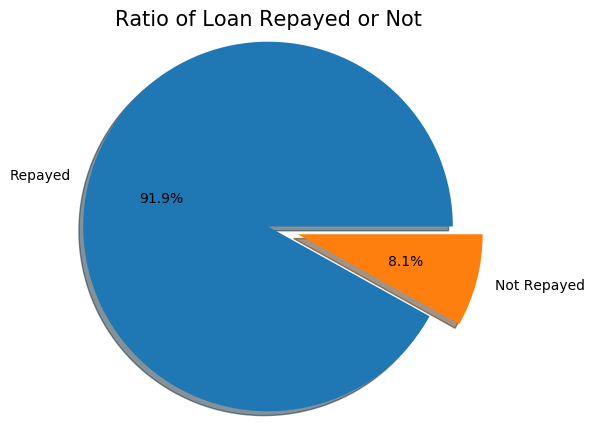

In [28]:
plt.figure(figsize=(12,5))

plt.pie(
    application_train.TARGET.value_counts(),
    labels = ['Repayed','Not Repayed'], 
    explode = (0, 0.2),
    shadow=True,
    autopct='%1.1f%%',
    radius = 1.2
)

plt.title("Ratio of Loan Repayed or Not", fontsize = 15)
plt.show()

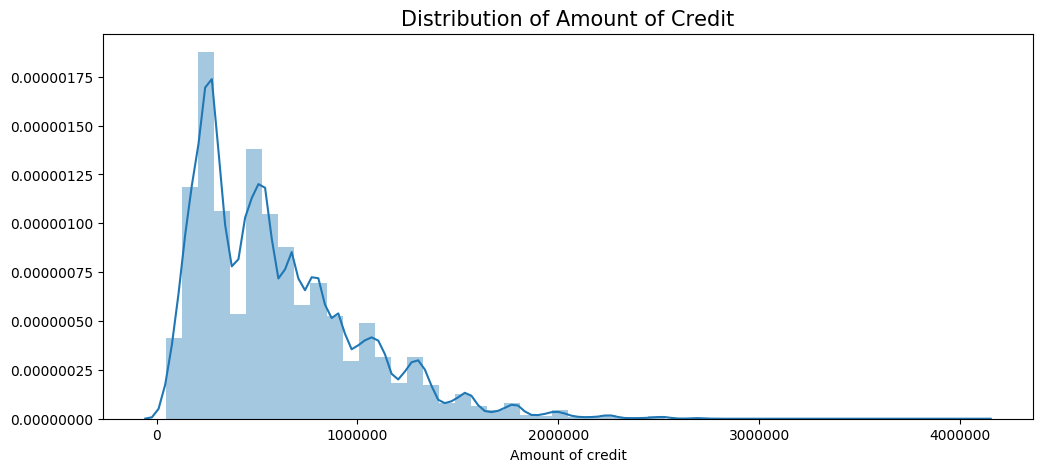

In [29]:
plt.figure(figsize=(12,5))

sns.distplot(application_train.AMT_CREDIT)

plt.title("Distribution of Amount of Credit", fontsize = 15)
plt.xlabel('Amount of credit')
plt.show()

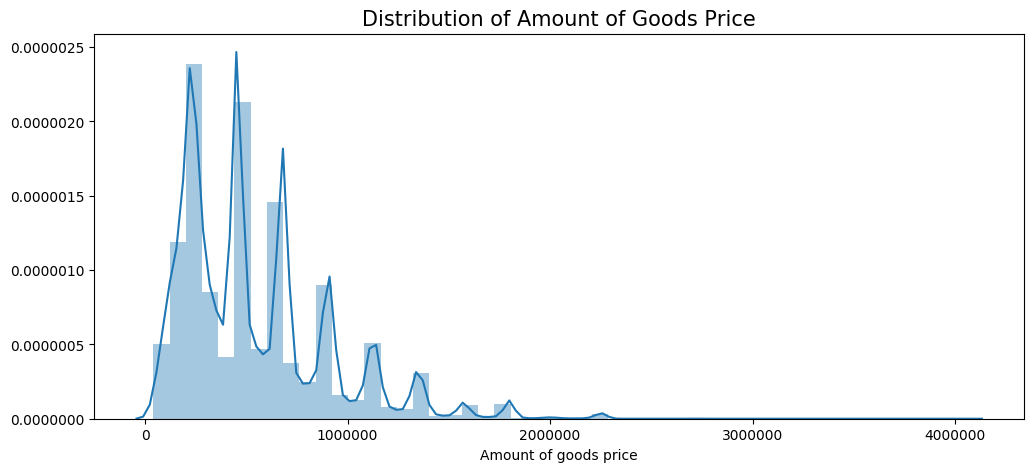

In [30]:
plt.figure(figsize=(12,5))

sns.distplot(application_train.AMT_GOODS_PRICE)

plt.title("Distribution of Amount of Goods Price", fontsize = 15)
plt.xlabel('Amount of goods price')
plt.show()

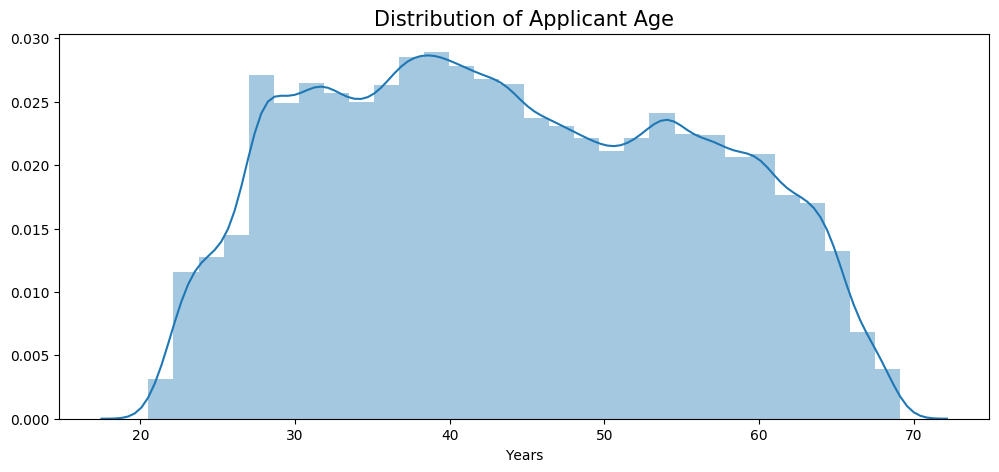

In [31]:
plt.figure(figsize=(12,5))

sns.distplot(application_train.DAYS_BIRTH / -365,bins = 30)

plt.title("Distribution of Applicant Age", fontsize = 15)
plt.xlabel('Years')
plt.show()

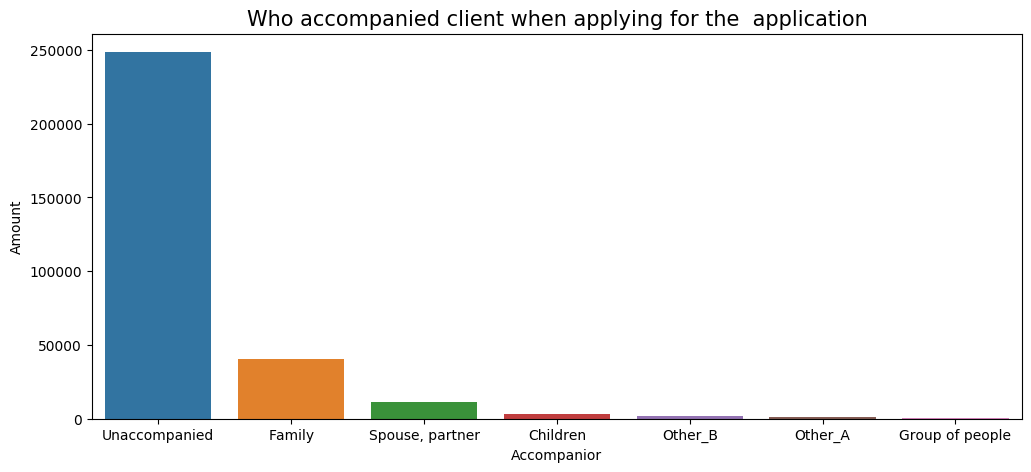

In [32]:
temp_df = application_train.NAME_TYPE_SUITE.value_counts().reset_index()

plt.figure(figsize=(12,5))

sns.barplot(data = temp_df, x = 'index', y = 'NAME_TYPE_SUITE')

plt.title("Who accompanied client when applying for the  application", fontsize = 15)
plt.xlabel('Accompanior')
plt.ylabel('Amount')
plt.show()

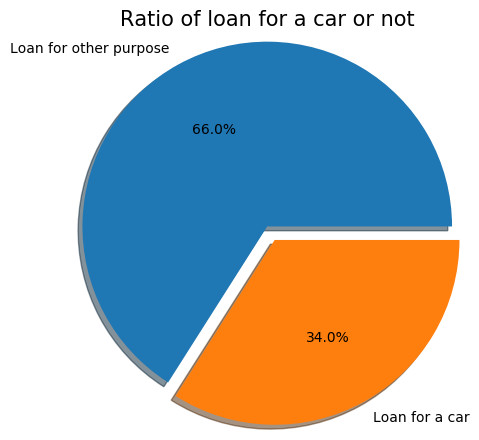

In [33]:
plt.figure(figsize=(12,5))

plt.pie(
    application_train.FLAG_OWN_CAR.value_counts(),
    labels = ['Loan for other purpose','Loan for a car'] ,
    explode = (0, 0.1),
    shadow = True,
    autopct = '%1.1f%%',
    radius = 1.2
)

plt.title("Ratio of loan for a car or not", fontsize = 15)
plt.show()

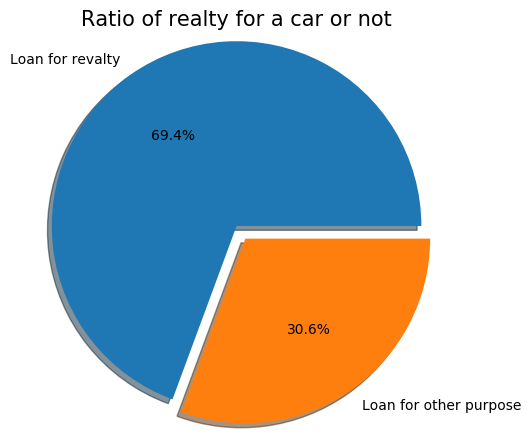

In [34]:
plt.figure(figsize=(12,5))

plt.pie(
    application_train.FLAG_OWN_REALTY.value_counts(),
    labels = ['Loan for revalty','Loan for other purpose'], 
    explode = (0, 0.1),
    shadow=True, 
    autopct='%1.1f%%',
    radius = 1.2
)

plt.title("Ratio of realty for a car or not", fontsize = 15)
plt.show()

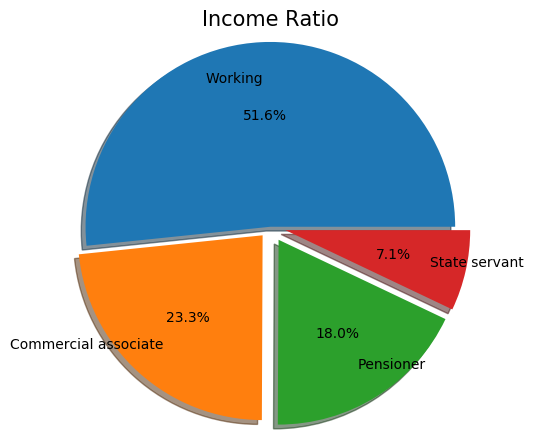

In [35]:
temp_df = application_train.NAME_INCOME_TYPE.value_counts()[:4]

plt.figure(figsize=(12,5))

plt.pie(
    temp_df,
    labels = temp_df[:4].index,
    explode = (0, 0.075,0.1,0.1), 
    shadow = True, 
    autopct = '%1.1f%%',
    labeldistance = 0.8,
    radius = 1.2
)

plt.title("Income Ratio", fontsize = 15)
plt.show()

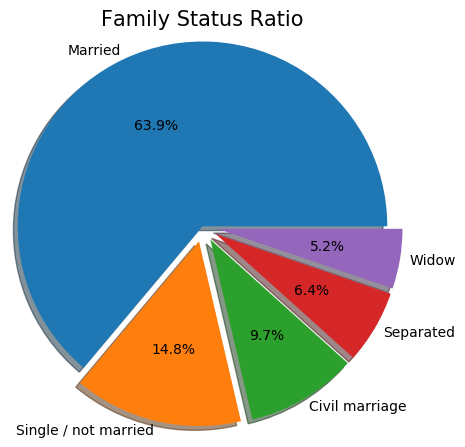

In [36]:
temp_df = application_train.NAME_FAMILY_STATUS.value_counts()[:-1]

plt.figure(figsize=(12,5))

plt.pie(
    temp_df,
    labels = temp_df.index,
    explode = (0,0.1,0.1,0.1,0.1), 
    shadow = True, 
    autopct = '%1.1f%%',
    labeldistance = 1.05,
    radius = 1.2
)

plt.title("Family Status Ratio", fontsize = 15)
plt.show()

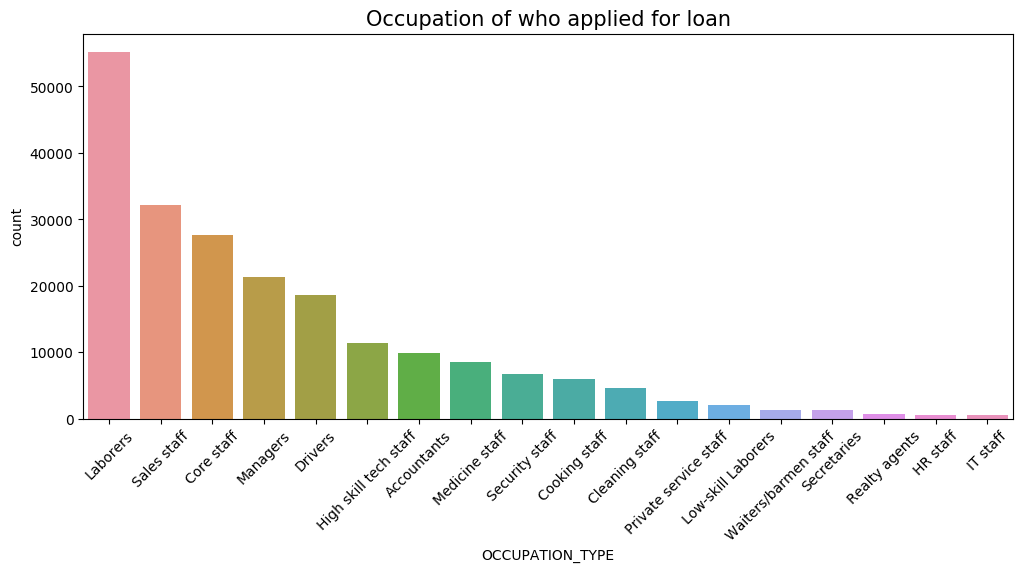

In [37]:
plt.figure(figsize=(12,5))

sns.countplot(
    data = application_train,
    x = 'OCCUPATION_TYPE',
    order = application_train['OCCUPATION_TYPE'].value_counts().index
)

plt.title("Occupation of who applied for loan", fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

In [38]:
def add_perc(ax, feature, Number_of_categories, hue_categories):
    '''
    Function which adds percentages grouped by hue column to the top of bars.
    
    Args:
    ----
    
    ax: matplotlib.axes
        Ax with plot.
    
    feature: pd.Series
        X axis feature.
        
    Number_of_categories: int
        Number of unique categories of X axis feature.
        
    hue_categories: int:
         Number of unique categories of hue feature.
    
    Returns:
    --------
    matplotlib.axes
        Annotated ax.
    
    '''
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y+1500), size = 12)

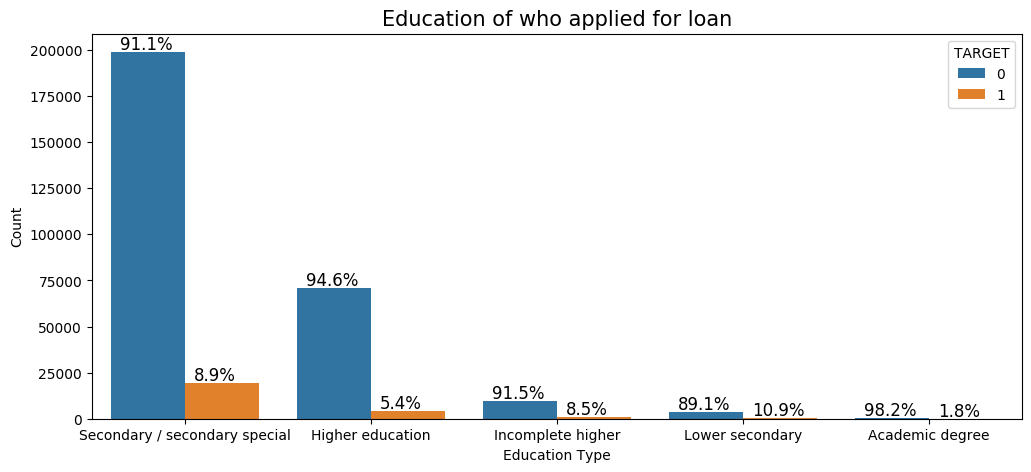

In [39]:
plt.figure(figsize=(12,5))

ax = sns.countplot(
    data = application_train,
    x = 'NAME_EDUCATION_TYPE',
    hue = 'TARGET',
    order = application_train['NAME_EDUCATION_TYPE'].value_counts().index
)

plt.title("Education of who applied for loan", fontsize = 15)
plt.xlabel('Education Type')
plt.ylabel('Count')
add_perc(ax,application_train.NAME_EDUCATION_TYPE,5,2)
plt.show()

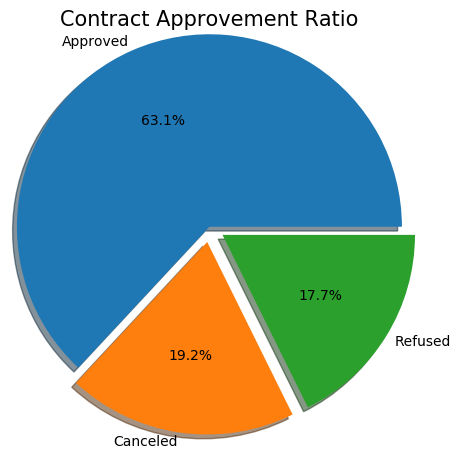

In [40]:
temp_df = previous_application.NAME_CONTRACT_STATUS.value_counts()[:-1]

plt.figure(figsize=(12,5))

plt.pie(
    temp_df,
    labels = temp_df.index,
    explode = (0,0.1,0.1), 
    shadow = True, 
    autopct = '%1.1f%%',
    labeldistance = 1.05,
    radius = 1.25
)

plt.title("Contract Approvement Ratio", fontsize = 15)
plt.show()

---

## <span style="color:#ff5f27;"> 🛠️ Feature Engineering </span>

#### <span style="color:#ff5f27;"> ⛳️ Dataset with amount of previous loans</span>

In [41]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


---

## <span style="color:#ff5f27;">👨🏻‍⚖️ Dealing with missing values</span>

In [42]:
def remove_nans(df):
    '''
    Function which removes missing values.
    If column has more than 20% of missing values -> remove.
    The rest missing values will be dropped by rows.
    
    Args:
    -----
    
    df: pd.DataFrame
        DataFrame in which all missing values will be deleted.
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with no missing values.
    
    '''
    nan_df = df.isna().sum()[df.isna().sum() > 0]
    nan_perc = (nan_df / df.shape[0] * 100).apply(int)
    cols_to_drop = nan_perc[nan_perc >= 20].index
    df = df.drop(cols_to_drop, axis = 1).dropna()
    return df

In [43]:
application_train = remove_nans(application_train)

application_train.isna().sum()[application_train.isna().sum() > 0]

Series([], dtype: int64)

In [44]:
application_test = remove_nans(application_test)

application_test.isna().sum()[application_test.isna().sum() > 0]

Series([], dtype: int64)

In [45]:
bureau = remove_nans(bureau)

bureau.isna().sum()[bureau.isna().sum() > 0]

Series([], dtype: int64)

In [46]:
credit_card_balance.dropna(inplace = True)

In [47]:
installments_payments.dropna(inplace = True)

In [48]:
pos_cash_balance.dropna(inplace = True)

In [49]:
previous_application = remove_nans(previous_application)

previous_application.isna().sum()[previous_application.isna().sum() > 0]

Series([], dtype: int64)

---
## <span style="color:#ff5f27;">🔬 🧬 Subsampling Data</span>

Our datasets have a lot of data. So we are going to subsample them in order to save our time.


In [50]:
import numpy as np

def get_subsample(df):
    '''
    Function which randomly selects 25% of input data
    
    Args:
    -----
    
    df: pd.DataFrame
        DataFrame from which we will get 25% subsample.
        
    Returns:
    --------
    pd.DataFrame
        25% of original DataFrame.
    
    '''
    indexes = np.random.choice(df.index, int(df.shape[0] * 0.25), replace = False)
    return df.loc[indexes].reset_index(drop = True)

In [51]:
application_train = get_subsample(application_train)

In [52]:
bureau_balance = get_subsample(bureau_balance)

In [53]:
bureau = get_subsample(bureau)

In [54]:
credit_card_balance = get_subsample(credit_card_balance)

In [55]:
installments_payments = get_subsample(installments_payments)

In [56]:
pos_cash_balance = get_subsample(pos_cash_balance)

In [57]:
previous_application = get_subsample(previous_application)

---

## <span style="color:#ff5f27;"> 🪄 Creating Feature Groups </span>

A `Feature Groups` is a logical grouping of features, and experience has shown, that this grouping generally originates from the features being derived from the same data source. The `Feature Group` lets you save metadata along features, which defines how the Feature Store interprets them, combines them and reproduces training datasets created from them.

Generally, the features in a feature group are engineered together in an ingestion job. However, it is possible to have additional jobs to append features to an existing feature group. Furthermore, `feature groups` provide a way of defining a namespace for features, such that you can define features with the same name multiple times, but uniquely identified by the group they are contained in.

> It is important to note that `feature groups` are not groupings of features for immediate training of Machine Learning models. Instead, to ensure reusability of features, it is possible to combine features from any number of groups into training datasets.

To begin with, lets import `hsfs` library.

- `hsfs` - Hopsworks Feature Store library in order to interact with the Hopsworks Feature Store.

The next step is to establish a connection with our Hopsworks Feature Store instance and retrieve the object that represents the Feature Store we are working with.

> By default `connection.get_feature_store()` returns the feature store of the project we are working with. However, it accepts also a project name as parameter to select a different feature store.

In [58]:
import hsfs

# Create a connection
connection = hsfs.connection()

# Get the feature store handle for the project's feature store
fs = connection.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.


> In addition we can check Feature Store's metadata such as name and description.

In [59]:
print(f'Feature Store Name: {fs.name}')
print(f'Feature Store Description: {fs.description}')

Feature Store Name: credit_scores_featurestore
Feature Store Description: Featurestore database for project: Credit_scores


### <span style="color:#ff5f27;">⛳️Creating Application train and test Feature Groups </span>

In [60]:
application_train.columns = [col_name.lower() for col_name in application_train.columns]

application_train_fg = fs.get_or_create_feature_group(
    name = 'application_train_fg',
    version = 1,
    primary_key = ['sk_id_curr'],
    online_enabled = False
)

application_train_fg.insert(application_train)

Feature Group created successfully, explore it at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/fs/68/fg/1037
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/jobs/named/application_train_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f8ab4ba44f0>, None)

In [61]:
application_test.columns = [col_name.lower() for col_name in application_test.columns]

application_test_fg = fs.get_or_create_feature_group(
    name = 'application_test_fg',
    version = 1,
    primary_key = ['sk_id_curr'],
    online_enabled = False
)

application_test_fg.insert(application_test)

Feature Group created successfully, explore it at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/fs/68/fg/1038
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/jobs/named/application_test_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f8ab48dcb20>, None)

#### <span style="color:#ff5f27;"> ⛳️ Bureau Balance Feature Group</span>

In [62]:
bureau_balance.columns = [col_name.lower() for col_name in bureau_balance.columns]

bureau_balance_fg = fs.get_or_create_feature_group(
    name = 'bureau_balance_fg',
    version = 1,
    primary_key = ['sk_id_bureau'],
    online_enabled = False
)

bureau_balance_fg.insert(bureau_balance)

Feature Group created successfully, explore it at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/fs/68/fg/1039
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/jobs/named/bureau_balance_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f8ab48c64c0>, None)

#### <span style="color:#ff5f27;"> ⛳️ Bureau Feature Group</span>

In [63]:
bureau.columns = [col_name.lower() for col_name in bureau.columns]

bureau_fg = fs.get_or_create_feature_group(
    name = 'bureau_fg',
    version = 1,
    primary_key = ['sk_id_curr','sk_id_bureau'],
    online_enabled = False
)

bureau_fg.insert(bureau)

Feature Group created successfully, explore it at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/fs/68/fg/1040
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/jobs/named/bureau_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f8ab4b81d60>, None)

#### <span style="color:#ff5f27;"> ⛳️ Previous Application Feature Group</span>

In [ ]:
previous_application.columns = [col_name.lower() for col_name in previous_application.columns]

previous_application_fg = fs.get_or_create_feature_group(
    name = 'previous_application_fg',
    version = 1,
    primary_key = ['sk_id_prev','sk_id_curr'],
    online_enabled = False
)

previous_application_fg.insert(previous_application)

Feature Group created successfully, explore it at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/fs/68/fg/1042
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/120/jobs/named/previous_application_fg_1_offline_fg_backfill/executions


#### <span style="color:#ff5f27;"> ⛳️ Pos_Cash_Balance Feature Group</span>

In [ ]:
pos_cash_balance.columns = [col_name.lower() for col_name in pos_cash_balance.columns]

pos_cash_balance_fg = fs.get_or_create_feature_group(
    name = 'pos_cash_balance_fg',
    version = 1,
    primary_key = ['sk_id_prev','sk_id_curr'],
    online_enabled = False
)

pos_cash_balance_fg.insert(pos_cash_balance)

#### <span style="color:#ff5f27;"> ⛳️ Instalments Payments Feature Group</span>

In [ ]:
installments_payments.columns = [col_name.lower() for col_name in installments_payments.columns]

installments_payments_fg = fs.get_or_create_feature_group(
    name = 'installments_payments_fg',
    version = 1,
    primary_key = ['sk_id_prev','sk_id_curr'],
    online_enabled = False
)

installments_payments_fg.insert(installments_payments)

#### <span style="color:#ff5f27;"> ⛳️ Credit Card Balance Feature Group</span>

In [ ]:
credit_card_balance.columns = [col_name.lower() for col_name in credit_card_balance.columns]

credit_card_balance_fg = fs.get_or_create_feature_group(
    name = 'credit_card_balance_fg',
    version = 1,
    primary_key = ['sk_id_prev','sk_id_curr'],
    online_enabled = False
)

credit_card_balance_fg.insert(credit_card_balance)

#### <span style="color:#ff5f27;"> ⛳️ Previous Load Counts Feature Group</span>

In [ ]:
previous_loan_counts.columns = [col_name.lower() for col_name in previous_loan_counts.columns]

previous_loan_counts_fg = fs.get_or_create_feature_group(
    name = 'previous_loan_counts_fg',
    version = 1,
    primary_key = ['sk_id_curr'],
    online_enabled = False
)

previous_loan_counts_fg.insert(previous_loan_counts)

---

## <span style="color:#ff5f27;">⏭️ **Next:** Part 02 </span>

In the next notebook we will use our feature groups to create a feature view and then training dataset we can train a model on.